✅ Dataset Loaded Successfully!
Dataset Shape: (418, 12)
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  

Missing Values Before Cleanin

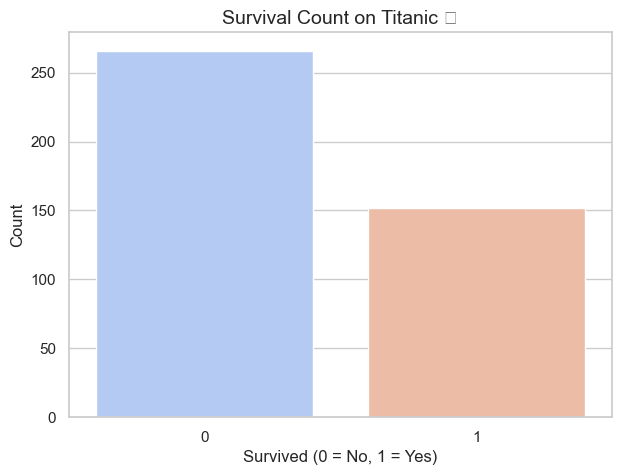

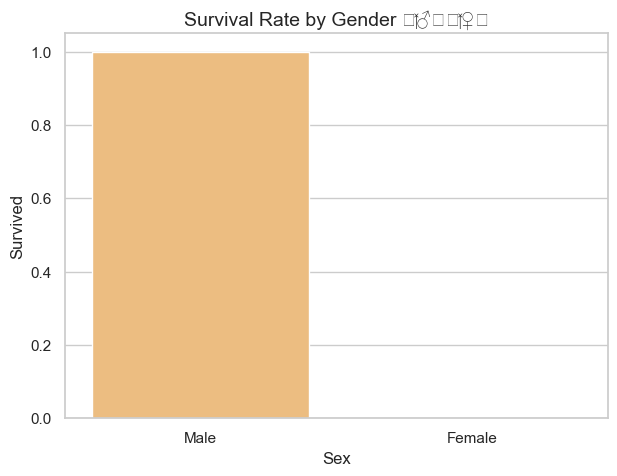

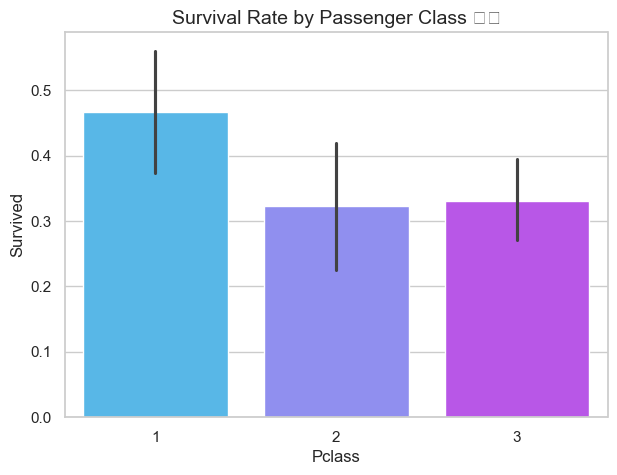

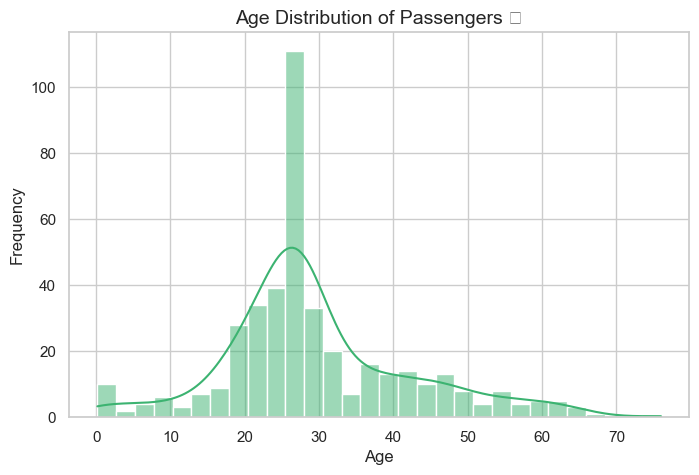

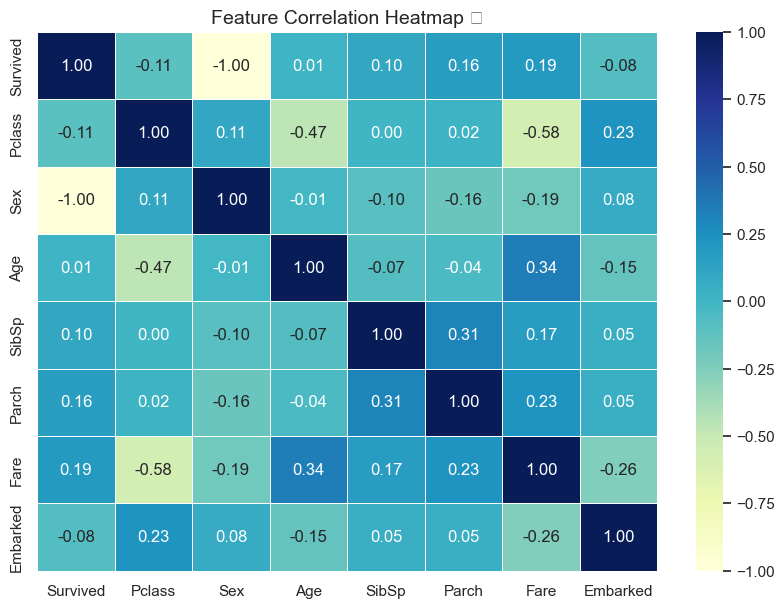


✅ Data Visualization Completed Successfully!

Training Samples: 334, Testing Samples: 84

✅ Model Evaluation Results:
Accuracy: 1.0000

Confusion Matrix:
 [[50  0]
 [ 0 34]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



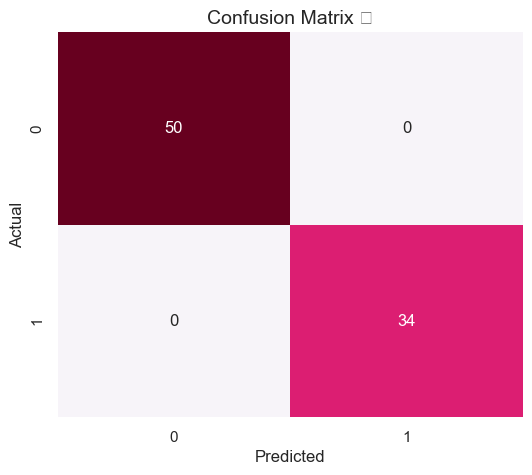

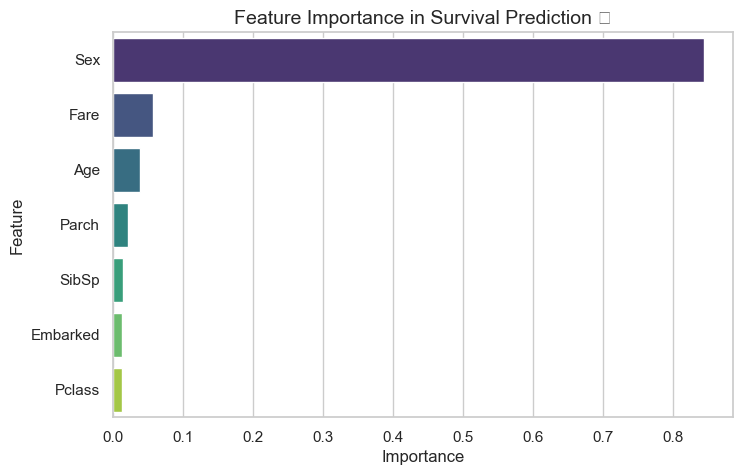


✅ Titanic Survival Classification Done!
🎯 Model Accuracy: 100.00%


In [1]:
# ==============================
# Titanic Survival Classification Project
# Internship Task1 - Arch Technologies
# Author: Abdullah Umer
# ==============================


# 1️⃣ Importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')




# 2️⃣ Load the Dataset
df = pd.read_csv("C:/Users/Abdullah Umer/Desktop/Arch Technologies Internship/Task 1/Titanic.csv")

print("✅ Dataset Loaded Successfully!")
print("Dataset Shape:", df.shape)
print(df.head())



# 3️⃣ Data Cleaning & Preprocessing

# Check missing values
print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())

# Drop columns that are not useful for prediction
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Fill missing Age and Fare with median values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# Encode categorical features (Sex, Embarked)
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

print("\n✅ Data Cleaning Done!")
print("Missing Values After Cleaning:")
print(df.isnull().sum())




# 4️⃣ Data Visualization
sns.set(style="whitegrid", palette="muted")

# Survival Count
plt.figure(figsize=(7, 5))
sns.countplot(x='Survived', data=df, palette='coolwarm')
plt.title("Survival Count on Titanic 🚢", fontsize=14)
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Survival by Gender
plt.figure(figsize=(7, 5))
sns.barplot(x='Sex', y='Survived', data=df, palette='Spectral')
plt.title("Survival Rate by Gender 🧍‍♂️🧍‍♀️", fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()

# Survival by Passenger Class
plt.figure(figsize=(7, 5))
sns.barplot(x='Pclass', y='Survived', data=df, palette='cool')
plt.title("Survival Rate by Passenger Class 🎟️", fontsize=14)
plt.show()

# Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True, color='mediumseagreen')
plt.title("Age Distribution of Passengers 🎂", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap 🔥", fontsize=14)
plt.show()

print("\n✅ Data Visualization Completed Successfully!")




# 5️⃣ Splitting Data for Model Training

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining Samples: {X_train.shape[0]}, Testing Samples: {X_test.shape[0]}")




# 6️⃣ Model Training (Random Forest)
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)



# 7️⃣ Model Evaluation

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\n✅ Model Evaluation Results:")
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='PuRd', cbar=False)
plt.title("Confusion Matrix 🧩", fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()





# 8️⃣ Feature Importance Visualization
importance = model.feature_importances_
features = X.columns

feature_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title("Feature Importance in Survival Prediction 🌟", fontsize=14)
plt.show()

print("\n✅ Titanic Survival Classification Done!")
print("🎯 Model Accuracy: {:.2f}%".format(accuracy * 100))









